# M5-Week5/Project: Communicating Your Data Insights

# <b>Introduction </b>

# Dataset information 

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


#### Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

We are using this dataset to find out more which group of people are in dangrouse with heart disease and reduce this kind of problems during treatment.

Firstly we will find the highest realated features to the target which include heart disease information. Then, we analysing these features and find out more about thease all. Also, we are going to check these feature for male and female to see which group is in more dangrouse. at end, we will discuss about the behavior of these feature and find the importance about them and find the reationship with target.



Finall, we will check the chi_squre test for some important feature and let audience know what feature is depend to the target and which one is not.

# Let being familiar with our dataset:

In [1]:
#import all necessary ibraries
import numpy as np # linear algebra
import pandas as pd # data processing
import os
#import seaborn for plotting
import seaborn as sns
import matplotlib.pyplot as plt
#import warning to not show warning messeages
import warnings
warnings.filterwarnings("ignore")
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
#imprt scipy for some statistics
from scipy.stats import chi2
from scipy import stats
from scipy.cluster import hierarchy as hc
from scipy.stats import norm, skew #for some statistics

# EDA & Cleaning

In [2]:
### from this kernel: https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model
#read csv
heart=pd.read_csv('heart.csv',sep=',')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#find more information about our dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
#find how many null value in our dataset
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#find about the statistic of our dataset
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#the number of columns nd rows
heart.shape

(303, 14)

In [7]:
#name of our columns
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#  Step 1:

My plan is to find the highest correlation features and study about them more in details. My assumption is, if I can invest on these feature and try to control those, I will help doctors to reduce the heart disease problem. In this scenario we are going to invest on these feature to help more patient with these feature who come to hospital. Doctor will be more familiar with this feature and pay more attention to patient with these conditions.

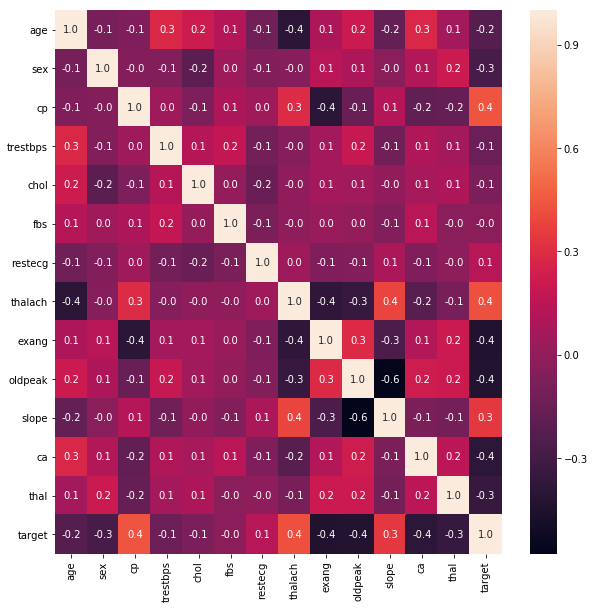

In [8]:
# findign the heatmap for find the correlation in our dataset
plt.figure(figsize=(10,10))
#add annot for writing the number of correlation on cells
sns.heatmap(heart.corr(),annot=True,fmt='.1f')
plt.show()

From this correlation matrix , I will choose the cp which is the chest pain with high correlation with target.. Also, using thalach which is maximum heart achived. The third one is slope. I prefer to focuse to the positive correlation, so we can find the problem and then as solution for this. 

My main goal behind this analysis is to make sure patient with these specific conditions get a high attention from doctor so they will be safe due to heart disease issue

#  Step 2:

 # Cleaning data and change the number to categorial dataset for some specific analysis

In [9]:
#creat new dataframe for specific analysis
heart_new=heart

In [10]:
#Change the number to categorial data by name for each number
heart_new.target=heart_new.target.replace({0:'No heart Disease',1:'Heart Disease'})
heart_new.sex=heart_new.sex.replace({0:'female',1:'male'})

heart_new.cp=heart_new.cp.replace({1:'typical angin',2:'atypical agina',3: 'non_anginal pain',0:'asymptomatic'})
heart_new.slope=heart_new.slope.replace({0:'upsloping',1:'flat',2: 'downsloping'})



# Step 3:

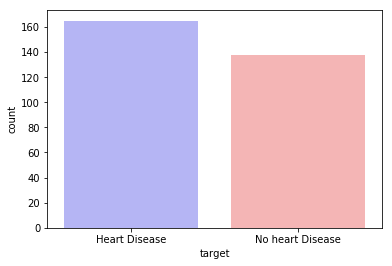

In [11]:
#check the target count
sns.countplot(data=heart_new,x='target', palette='bwr')

It is obviouse that the amount of Heart disease is more than No heart disease records in this dataset.

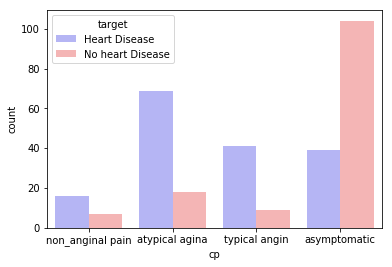

In [12]:
#check the target behave based on chain pain type
sns.countplot(x='cp',hue='target',data=heart,palette='bwr')

By this plot we just checking the result for heart disease based on the type of chain pain. In this plot we can see except result for absent the highest heart disease is for atypical agnia and then agnia pectoris. So, as a Doctor I think if a patient have these type of pain it means that they are in dangoure more than other type of chain pain and they are in risk of heart disease more than other type of chain pain. So, be careful about these two type.

In [13]:
cp_range_thalach=heart.groupby('cp')['thalach'].mean()

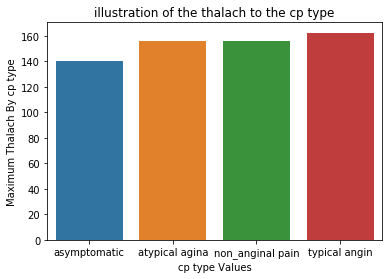

In [14]:
sns.barplot(x=cp_range_thalach.index,y=cp_range_thalach.values)
plt.xlabel('cp type Values')
plt.ylabel('Maximum Thalach By cp type')
plt.title('illustration of the thalach to the cp type')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In this plot I used to find out about the chest pain and max heart rate for each type of chest pain. AS it can be seen that the asymptomatic has the lowest heart rate and the highest one is related to typical angin.

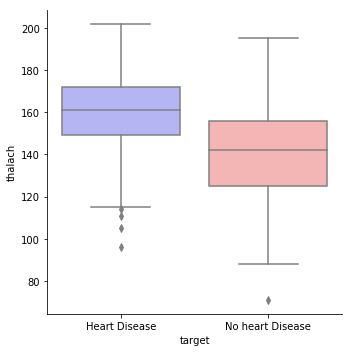

In [15]:
#checking the second factor with high correlation with target
sns.catplot(x='target',y='thalach',kind='box',data=heart_new,palette='bwr')

 As a second factor which has the highest correaltion with target we can check it and we can see the mean of Hear disease around 160 and we should take care of the patient with these range of max _heart_rate between (150-170). It means that if max rate of patient is in these range they are at risk of heart disease.

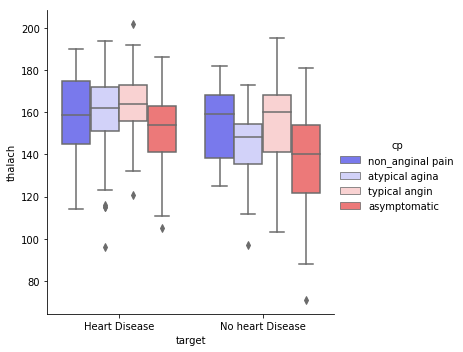

In [16]:
#checking the result oftarget based on maximum hear rate and chain pain type
sns.catplot(x='target',y='thalach',hue='cp',kind='box',data=heart_new,palette='bwr')

We put all together to find out more about the higest correlation behavoir . So wth this plot we can find out more which type of chain pain with heart disease or not exist in which range of maximum heart rate. Our goal is to reduce the heart disease so it reveals that most cases has the same maximum heart rate which is aroung 160. So our conclusion from tha last plot still correct and we need to take care of patient more which this amout of macimum hear rate. But more in details we can see the non_anginal pain which heart disease and absent have the wide range in maximum rate which start from 120 to 190.

The patient with no heart disese show more fluctuation in maximum heart rate.

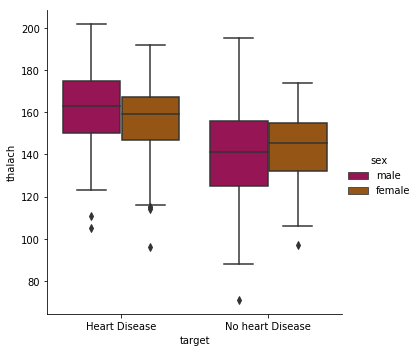

In [17]:
#checking the result of target based on maximum heart rate and chain pain type
sns.catplot(x='target',y='thalach',hue='sex',kind='box',data=heart_new,palette="brg")

Checking the range of maximum rate by gender shows that the maximum heart rate is more fluctuated in male rather than women who has the heart disease. But for ppl who has not heart disease is more wider than with heart disese.Also, male is more wider than women with no heart disease.

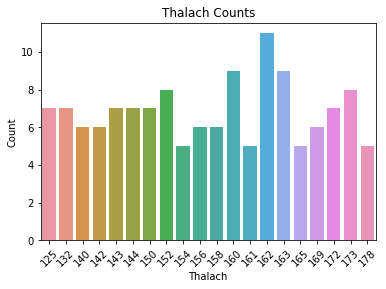

In [18]:
# count the top 20 of maximum heart rate
sns.barplot(x=heart_new.thalach.value_counts()[:20].index,y=heart_new.thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

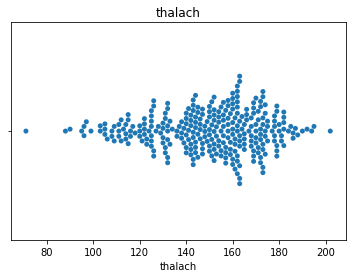

In [19]:
#chekc by swarm plot
sns.swarmplot(x=heart_new.thalach)
plt.title('thalach')
plt.show()

This plot shows that the top 20 of maximum heart rate and the highest repitation is for 162. This plot confirm last plot too and we should be careful about this number when patient has this result.


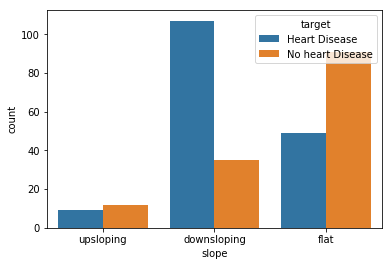

In [20]:
#check the slope which is the third important factor which has a high correlation wiht target
sns.countplot(x='slope',hue='target',data=heart_new)

This barchart can show us the number of slope whihc heart dieses or not. As we can see the downsloping group has the highest heart disease in this case.

# Step 4:

# Check the correlation for features

In [21]:
#read csv
heart=pd.read_csv('heart.csv',sep=',')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


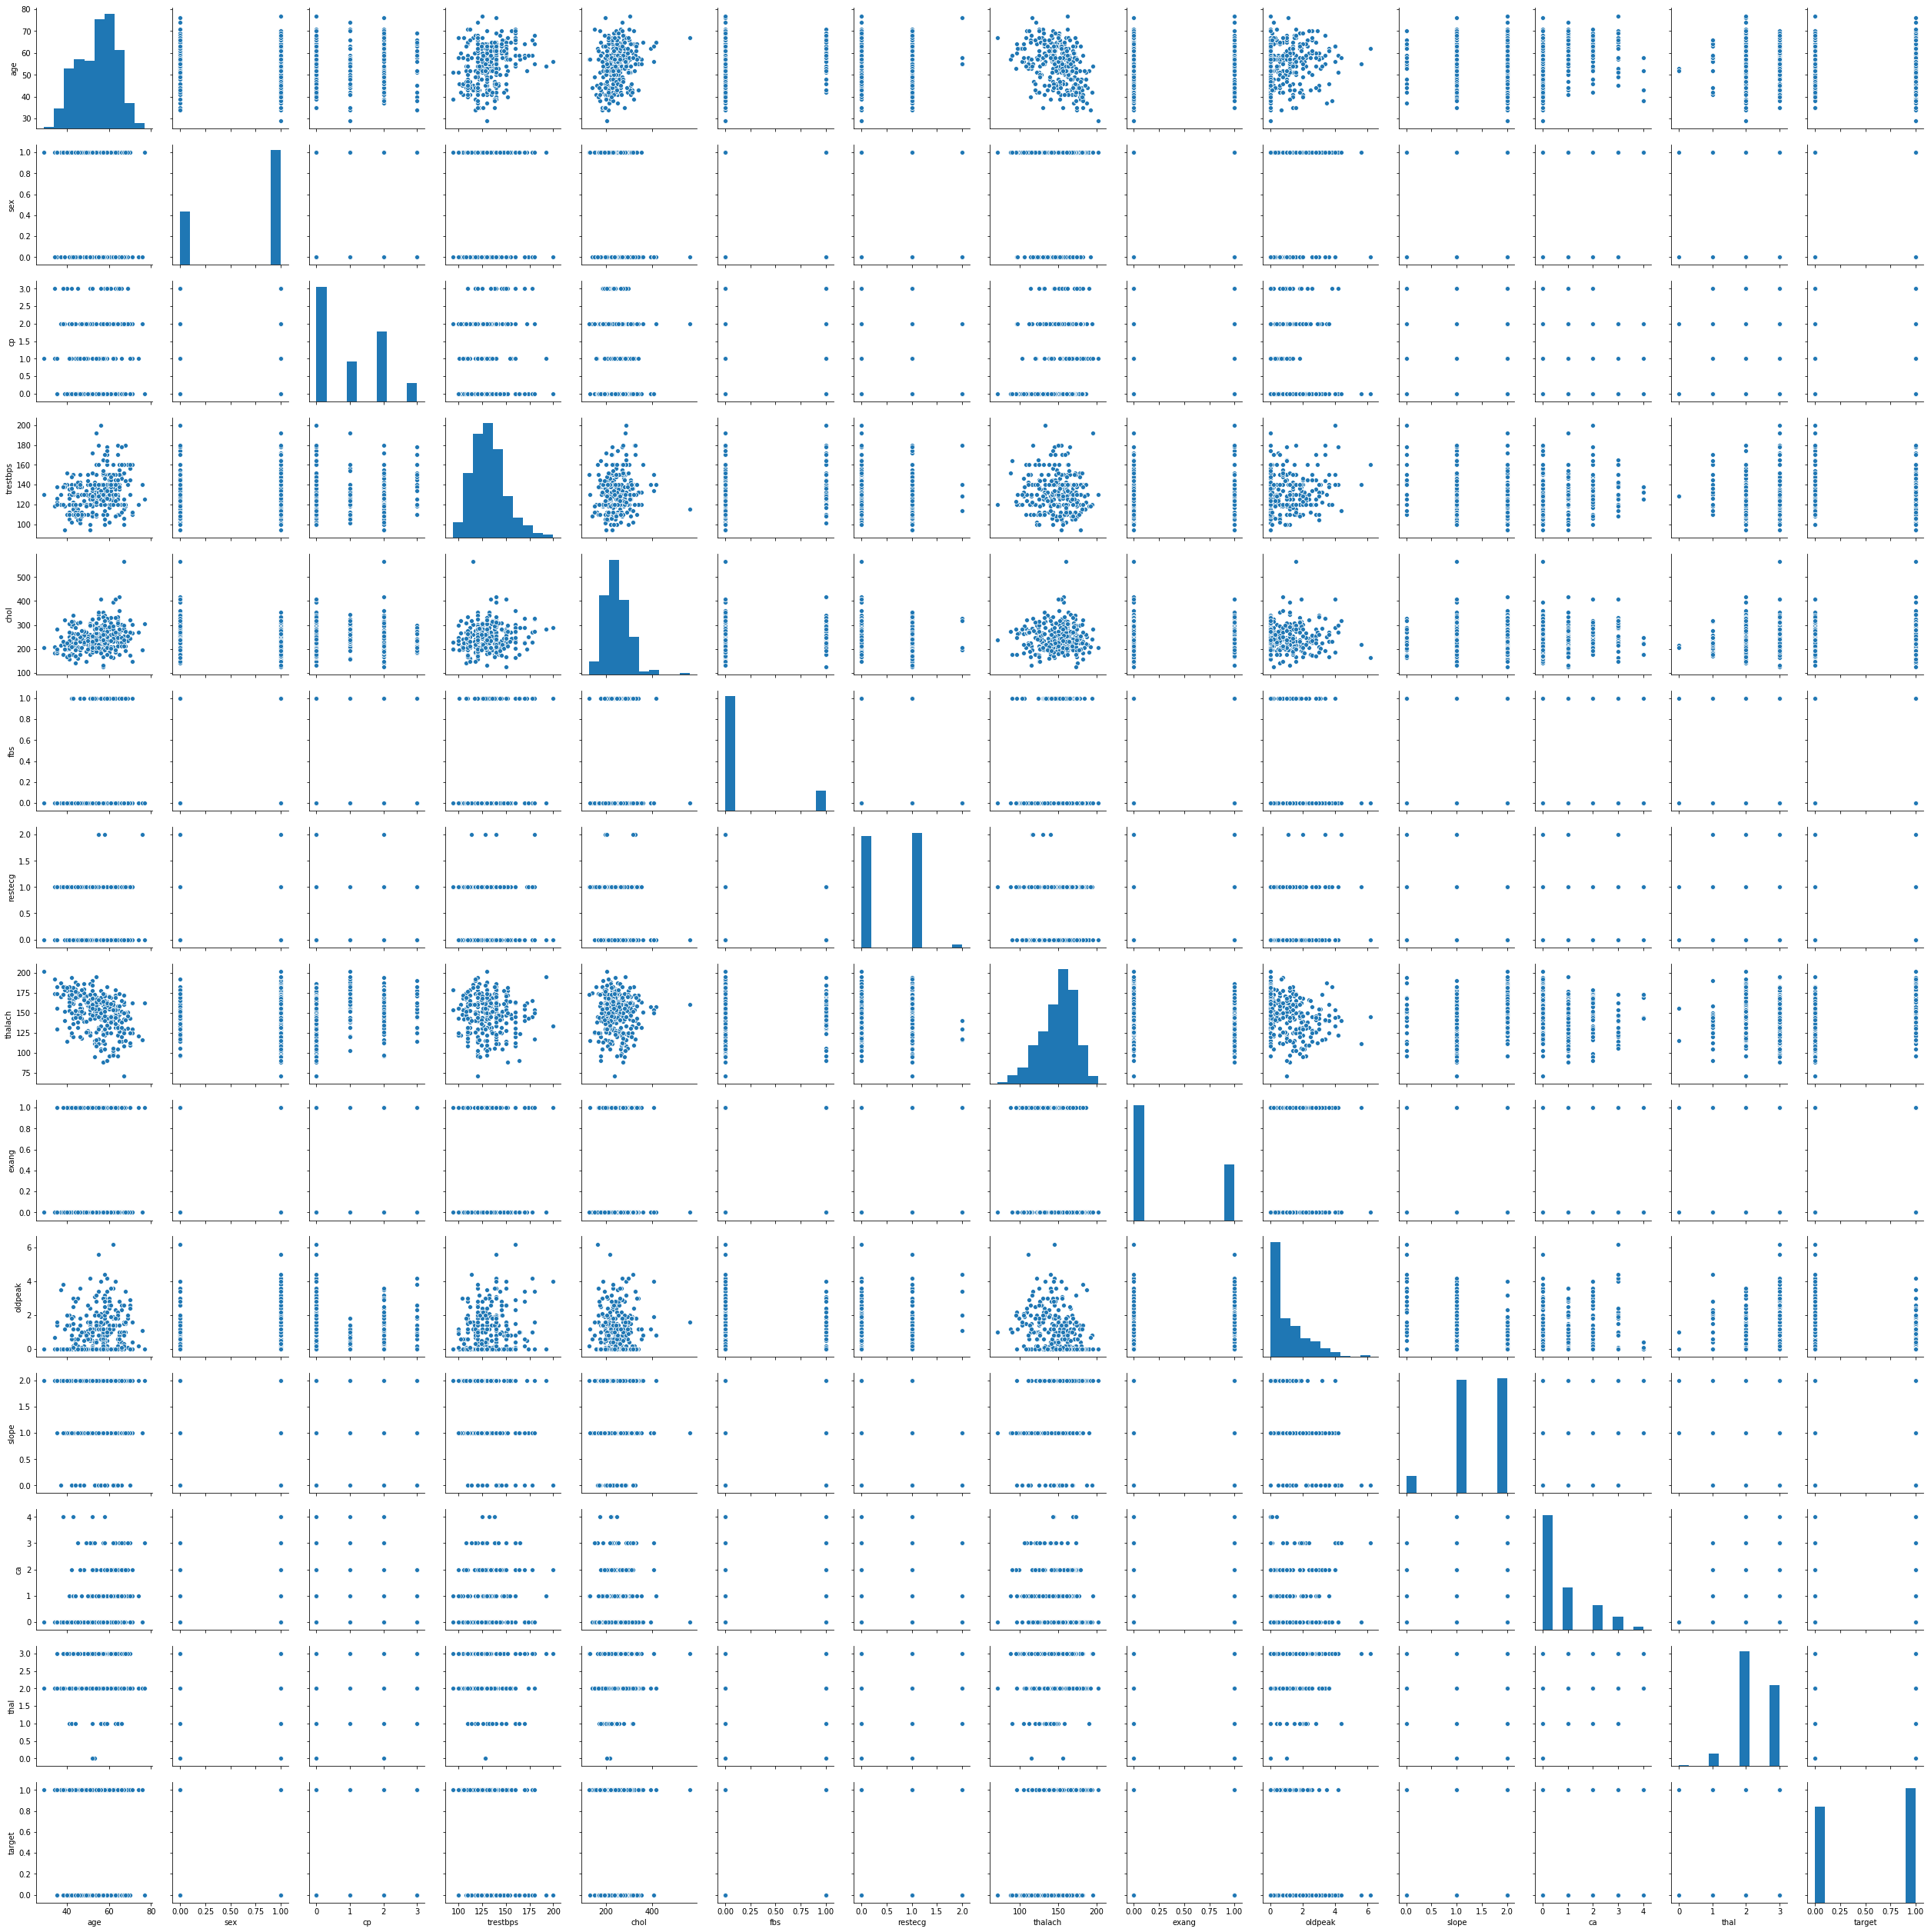

In [22]:
sns.pairplot(heart)

with this plot we can easily find more about the feature relationship with each others. The scatter plot for each feature is obviouse and from this we can see what will happen for each specific feature. For simpilicity I will plot correlation matrix to find high correlated features directly from heat map.

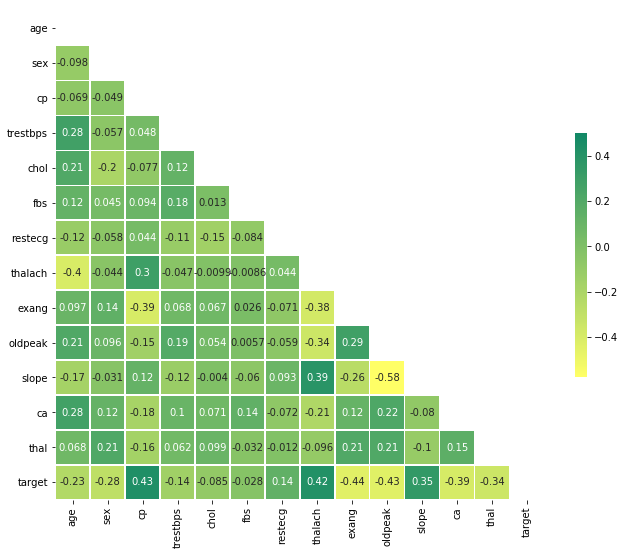

In [23]:
#check the correlation matrix
import seaborn as sns
corr = heart.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

As we found it before the chest pain (cp) and maximum heart rate (thalach) have the highest correlation with target and the third one is slope.

# Step 5:

# Checking the distribution of target and some other features.

In [24]:
#read csv
heart=pd.read_csv('heart.csv',sep=',')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5,0,'target distribution')

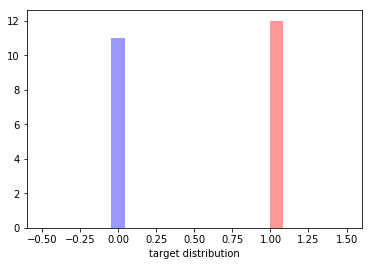

In [25]:
#check distribution of target
#hd=(heart[heart['target']==1].count()/303)*100
#nhd=(heart[heart['target']==0].count()/303)*100
sns.distplot(heart[heart.target==0].target,color='b')
sns.distplot(heart[heart.target==1].target,color='r')
plt.xlabel('target distribution')

 We have the bernoi distribution for target because it includes 0 and 1 .
 The 1

Text(0.5,0,'target distribution')

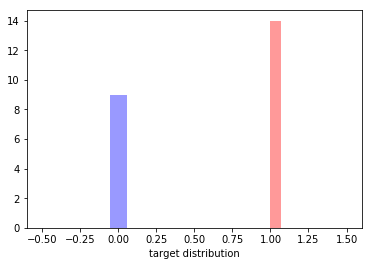

In [26]:
sns.distplot(heart[heart.sex==0].sex,color='b')
sns.distplot(heart[heart.sex==1].sex,color='r')
plt.xlabel('target distribution')

 We have the bernoi distribution for sex as well because it includes 0 and 1 .
 


 mu = 149.65 and sigma = 22.87



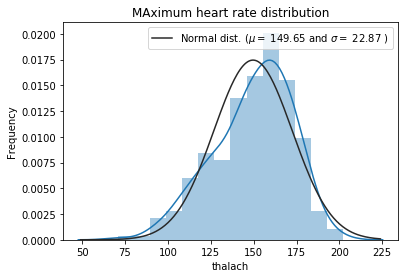

In [27]:
#plot histogram to find out more about the distribution of it
#using seaborn dist plot and fit normal distribution with it
sns.distplot(heart['thalach'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(heart['thalach'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MAximum heart rate distribution')
plt.show()

 We have the Normal distribution for thalach.The black line is the normal distribution with  mu = 149.65 and sigma = 22.87.The blue line is for our dataset.
 


 mu = 54.37 and sigma = 9.07



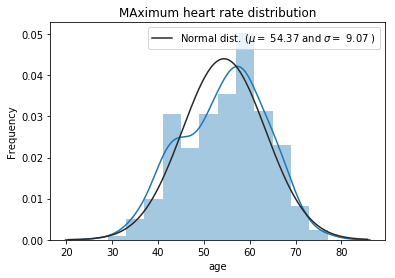

In [28]:
#plot histogram to find out more about the distribution of it
#using seaborn dist plot and fit normal distribution with it
sns.distplot(heart['age'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(heart['age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MAximum heart rate distribution')
plt.show()

 We have the Normal distribution for age.The black line is the normal distribution with  mu = 54.37 and sigma = 9.07.The blue line is for our dataset.

Text(0.5,1,'Distribution of chest pain and maximum rate for people who do have  eart disease')

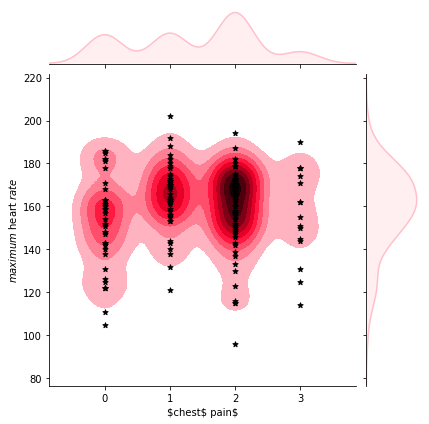

In [29]:
g = sns.jointplot(x="cp", y="thalach", data = heart[(heart.target == 1)],kind="kde", color="pink")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$chest$ pain$", "$maximum$ heart $rate$")
ax.set_title('Distribution of chest pain and maximum rate for people who do have  eart disease')

As it can be seen that the type 2 of chest pain has he highest maximum rate repitation (160) which is more dangreouse than other type. We found the same result in step 3 as well. Due to this fact doctor should be more careful of this type of chest pain.

Text(0.5,1,'Distribution of chest pain and maximum rate for people who do have  eart disease')

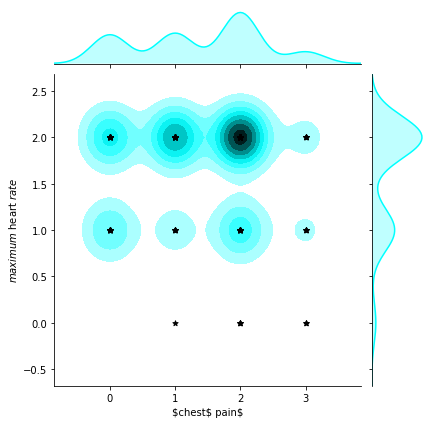

In [30]:
g = sns.jointplot(x="cp", y="slope", data = heart[(heart.target == 1)],kind="kde", color="cyan")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="*")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$chest$ pain$", "$maximum$ heart $rate$")
ax.set_title('Distribution of chest pain and maximum rate for people who do have  eart disease')

from this plot also we can see that the type 2 of chest pain has downsloping repitation which is more dangreouse than other type. We found the same result in step 3 as well. Due to this fact doctor should be more careful of this type of chest pain at downsloping part.

# Hypothesis test for features

Let tests all these feature to know about dependency of them from target and we will choose which feature we should add in our model as mail feature and as additional feature to have more strong and powerful model.

In [31]:
#change the name of columns for being more readable

heart_new.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [32]:
#define the function for creating the table for our variable
test = pd.DataFrame()
def table_creation(row, col):
    test = pd.crosstab(index=row,columns=col,margins=True)
    test.columns = ["1","2","3","4","rowtotal"]
    return(test);

In [33]:
#define the fucntion for chi_squre test:
def chisq_test(t, i):
    # Get table without totals for later use
    observed = t.ix[0:2,0:5]   
    #To get the expected count for a cell.
    expected =  np.outer(t["rowtotal"][0:2],t.ix["All"][0:5])/1010
    expected = pd.DataFrame(expected)
    expected.columns = ["1","2","3","4","5"]
    expected.index= test.index[0:2]
    #Calculate the chi-sq statistics
    chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
    print("Chi-sq stat")
    print(chi_squared_stat)
    crit = chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = i)   # *
    print("Critical value")
    print(crit)
    p_value = 1 - chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=i)
    print("P value")
    print(p_value)
    return;

In [34]:
#use the table for find about the answer and test chi squre for target and chest pain type
test = table_creation(heart_new["target"],heart_new["chest_pain_type"])
print(test)
chisq_test(test,4)

                    1   2   3   4  rowtotal
target                                     
Heart Disease      39  69  16  41       165
No heart Disease  104  18   7   9       138
All               143  87  23  50       303
Chi-sq stat
767.1880918398149
Critical value
9.487729036781154
P value
0.0


Based on the Chi square test we can realize that chest pain type is dpendent from target. In this case we should use this feature in modeling.

In [35]:
#def
test = pd.DataFrame()
def table_creation(row, col):
    test = pd.crosstab(index=row,columns=col,margins=True)
    test.columns = ["1","2","rowtotal"]
    return(test);

def chisq_test(t, i):
    # Get table without totals for later use
    observed = t.ix[0:2,0:5]   
    #To get the expected count for a cell.
    expected =  np.outer(t["rowtotal"][0:2],t.ix["All"][0:5])/1010
    expected = pd.DataFrame(expected)
    expected.columns = ["1","2","3"]
    expected.index= test.index[0:2]
    #Calculate the chi-sq statistics
    chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
    print("Chi-sq stat")
    print(chi_squared_stat)
    crit = chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = i)   # *
    print("Critical value")
    print(crit)
    p_value = 1 - chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=i)
    print("P value")
    print(p_value)
    return;

In [36]:
#use the table for find about the answer and test chi squre for P8 and gender
test = table_creation(heart_new["target"],heart_new["sex"])
print(test)
chisq_test(test,4)

                   1    2  rowtotal
target                             
Heart Disease     72   93       165
No heart Disease  24  114       138
All               96  207       303
Chi-sq stat
574.6146130492067
Critical value
9.487729036781154
P value
0.0


In [37]:
#use the table for find about the answer and test chi squre for P8 and gender
test = table_creation(heart_new["target"],heart_new["fasting_blood_sugar"])
print(test)
chisq_test(test,4)

                    1   2  rowtotal
target                             
Heart Disease     142  23       165
No heart Disease  116  22       138
All               258  45       303
Chi-sq stat
495.6944303159672
Critical value
9.487729036781154
P value
0.0


Based on the Chi square test we can realize that fasting blood sugar is dpendent from target. In this case we should use this feature in modeling.

In [38]:
#use the table for find about the answer and test chi squre for P8 and gender
test = table_creation(heart_new["target"],heart_new["exercise_induced_angina"])
print(test)
chisq_test(test,4)

                    1   2  rowtotal
target                             
Heart Disease     142  23       165
No heart Disease   62  76       138
All               204  99       303
Chi-sq stat
687.5643173578769
Critical value
9.487729036781154
P value
0.0


Based on the Chi square test we can realize that exercise induced angina is dpendent from target. In this case we should use this feature in modeling.

In [39]:
#def
test = pd.DataFrame()
def table_creation(row, col):
    test = pd.crosstab(index=row,columns=col,margins=True)
    test.columns = ["1","2",'3',"rowtotal"]
    return(test)

In [40]:

#ff
def chisq_test(t, i):
    # Get table without totals for later use
    observed = t.ix[0:2,0:5]   
    #To get the expected count for a cell.
    expected =  np.outer(t["rowtotal"][0:2],t.ix["All"][0:5])/1010
    expected = pd.DataFrame(expected)
    expected.columns = ["1","2","3",'4']
    expected.index= test.index[0:2]
    #Calculate the chi-sq statistics
    chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
    print("Chi-sq stat")
    print(chi_squared_stat)
    crit = chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = i)   # *
    print("Critical value")
    print(crit)
    p_value = 1 - chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=i)
    print("P value")
    print(p_value)
    return;

In [41]:
#use the table for find about the answer and test chi squre for P8 and gender
test = table_creation(heart_new["target"],heart_new["st_slope"])
print(test)
chisq_test(test,4)

                    1    2   3  rowtotal
target                                  
Heart Disease     107   49   9       165
No heart Disease   35   91  12       138
All               142  140  21       303
Chi-sq stat
653.2563225201009
Critical value
9.487729036781154
P value
0.0


Based on the Chi square test we can realize that st_slope is dpendent from target. In this case we should use this feature in modeling.

#  The result of chi_squre test:

After testing some feature, I decided to choose Chest pain type( Cp), maximum heart rate (thalach) and slope as my main feature and age and sex as additional features. So , I can build the model based on these important features. I have chosen sex and age as additional features due to the fact from information on internet which shows age and sex are important factor for pateint who has heart disease. So, if I want to build machine learning for this data set these all should be in my model. So these all feature are must in my model but if I want to be more careful I will add other features such as fasting blood suger and exercise induced angina because from chi test target also dependent on these features as well.

#  Conclusion:

 From our analysis of this dataset we find out about the some features that have high correlation with target and we will investigate on them to reduce the probability of heart disease.So, in this case if doctors in hospital get to know about these features and their behave they will predict more better about heart disease and pay more attention to patient with these kind of conditions. I am so happy that can find these features because It can help many people who are suffering from heart disease due to lack of analysing data and use these gold information for future patients.